In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [19]:
def plot_comparisons(x, y1, y2, y_label, save_loc, y1_err=None, y2_err=None):
    # create an index list for x-values
    x_values = range(len(x))
    y1 = np.array(y1)
    y2 = np.array(y2)

    fig, ax = plt.subplots()
    # add std err if over multiple seeds
    if y1_err is not None:
        y1_err = np.array(y1_err)
        y2_err = np.array(y2_err)
        ax.fill_between(x_values, y1-y1_err, y1+y1_err, color='black', alpha=0.1)
        ax.fill_between(x_values, y2-y2_err, y2+y2_err, color='deeppink', alpha=0.1)
    ax.plot(x_values, y1, marker='o', color='black', label='RLHF')
    ax.plot(x_values, y2, marker='o', color='deeppink', label='Feature Preference (Prag)')

    # set x-ticks to be the comparison values
    ax.set_xticks(x_values)
    ax.set_xticklabels(x)
    ax.yaxis.set_ticks(np.arange(0.5, 1.05, 0.1))

    ax.set_xlabel('Number of Comparisons')
    ax.set_ylabel(y_label)
    ax.set_ylim(ymin=0.5)
    ax.legend(loc='lower right')
    plt.savefig(save_loc + '/0' + y_label + '_comparisons.pdf')

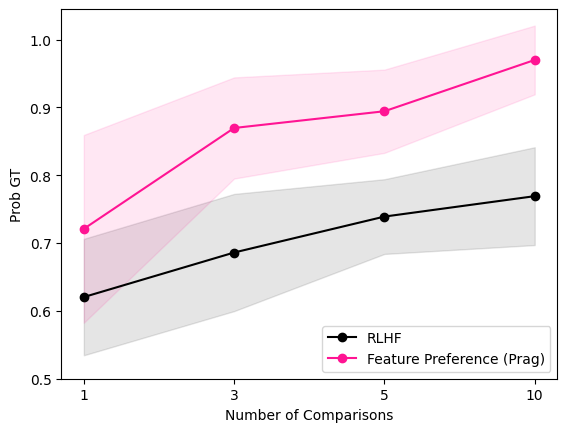

In [23]:
comparisons = [1,3,5,10]
rlhf_probs =  [0.6204136269235485, 0.6860737414433326, 0.7390692970138097, 0.7691828122378896]
rlhf_probs_err = [0.08584082686531828, 0.08639740345016164, 0.05509457440324968, 0.07212587556440409]
featureprefshuman_probs = [0.7209618105488902, 0.8696923861665694, 0.8943653614569601, 0.969980387128364]
featureprefshuman_probs_err = [0.13840341112243418, 0.07455746786395938, 0.06136487020517802, 0.05066541953447807]

save_loc = '../results/flights/average/'
plot_comparisons(comparisons, rlhf_probs, featureprefshuman_probs, 'Prob GT', save_loc, rlhf_probs_err, featureprefshuman_probs_err)